In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from compute_psycho import relaxation_job, emotions_job
import ghibtools as gh
from params import *
from bibliotheque import df_baseline
from configuration import *

# RELAXATION 

In [2]:
metrics = ['Arousal','Relaxation','Relaxation_intensity','Perceived_duration']

clean_label = {'Arousal':'Arousal',
              'Relaxation':'Relaxation',
              'Relaxation_intensity':'Relaxation Intensity',
              'Perceived_duration':'Perceived Duration'}

indexes = ['participant','session']

In [3]:
concat = []
for participant in subject_keys:
    concat.append(relaxation_job.get(participant).to_dataframe())
df = pd.concat(concat).reset_index(drop = True)
df = df.drop(columns = ['stim_name'])
df[metrics] = df[metrics].astype(float)

In [4]:
df_ratio = df_baseline(df, indexes, metrics)

In [5]:
df

,participant,session,Arousal,Relaxation,Relaxation_intensity,Perceived_duration
0,P01,baseline,11.0,10.0,4.0,96.0
1,P01,music,24.0,66.0,61.0,75.0
2,P01,odor,13.0,67.0,61.0,87.0
3,P02,baseline,7.0,93.0,95.0,62.0
4,P02,music,35.0,89.0,91.0,59.0
...,...,...,...,...,...,...
85,P30,music,86.0,56.0,78.0,55.0
86,P30,odor,36.0,93.0,87.0,59.0
87,P31,baseline,22.0,75.0,67.0,12.0
88,P31,music,83.0,65.0,67.0,22.0


In [6]:
df_ratio

,participant,session,Arousal,Relaxation,Relaxation_intensity,Perceived_duration
0,P01,odor,1.181818,6.700000,15.250000,0.906250
1,P02,odor,9.142857,0.698925,0.863158,0.500000
2,P03,odor,1.909091,1.151515,1.107692,14.666667
3,P04,odor,2.041667,1.265625,0.957746,1.000000
4,P05,odor,8.500000,0.926316,0.896907,0.767677
5,P06,odor,3.222222,1.261538,1.303030,0.812500
6,P07,odor,5.272727,0.955224,0.840580,1.050000
7,P08,odor,0.928571,0.866667,0.920000,1.520000
8,P09,odor,1.741935,1.365385,1.283019,0.690476
9,P10,odor,23.000000,1.186667,2.827586,0.552632


/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarn

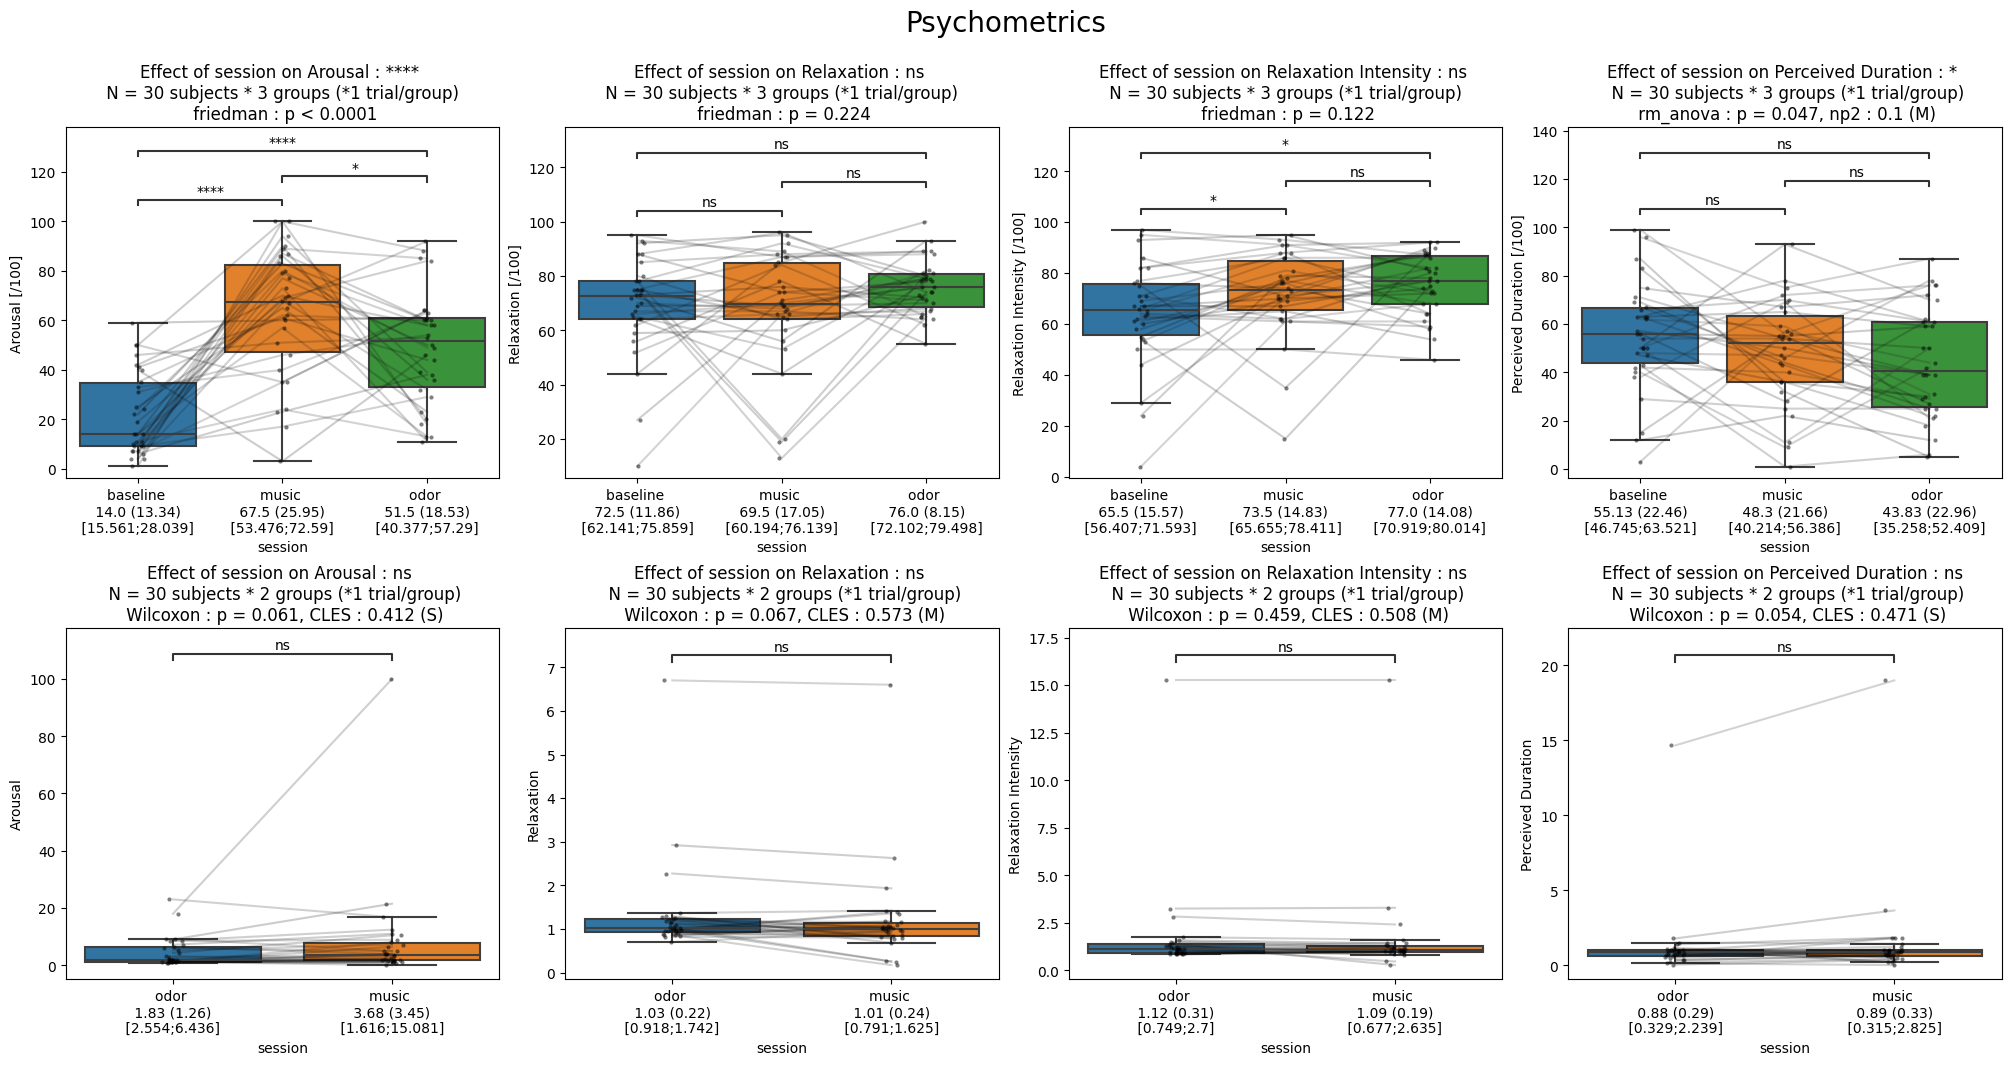

In [7]:
nrows = 2
ncols = 4

fig , axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,10), constrained_layout = True)
fig.suptitle('Psychometrics', y = 1.05 , fontsize = 20)

for i, col in enumerate(metrics):
    ax = axs[0,i]
    gh.auto_stats(df = df, predictor = 'session', outcome = col, design = 'within', subject = 'participant', ax=ax, outcome_clean_label = clean_label[col], outcome_unit = '/100')
    
    ax = axs[1,i]
    gh.auto_stats(df = df_ratio, predictor = 'session', outcome = col, design = 'within', subject = 'participant', ax=ax, outcome_clean_label = clean_label[col])
 
fig.savefig(base_folder / 'Figures' / 'Psycho' / 'psycho_relaxation.png', bbox_inches = 'tight')

In [8]:
df['log_Relaxation'] = np.log(df['Relaxation'])

<AxesSubplot: >

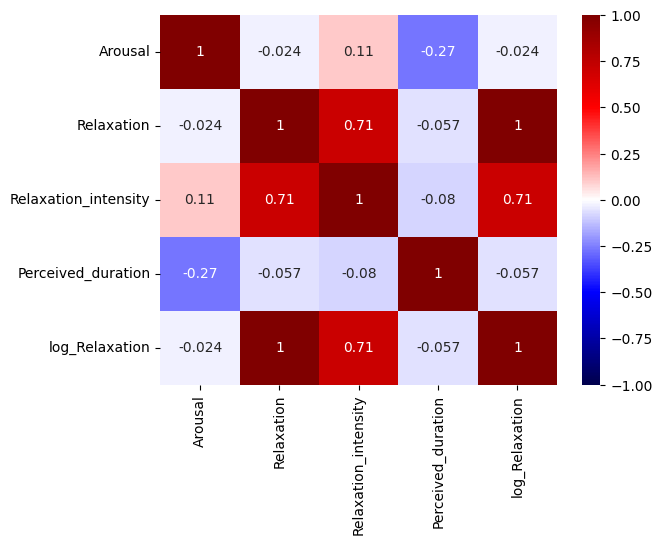

In [9]:
sns.heatmap(df.corr('spearman',numeric_only = True), annot = True, cmap = 'seismic' , vmin = - 1, vmax = 1)

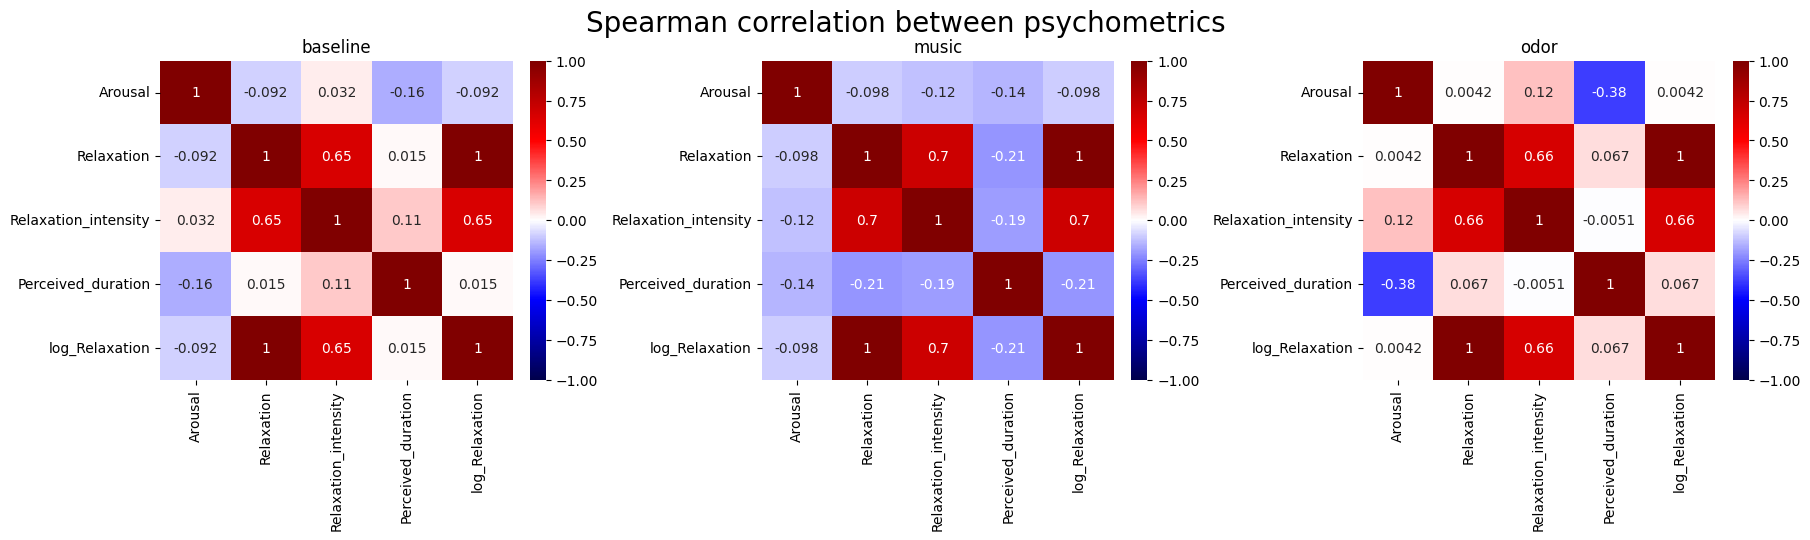

In [10]:
ncols = len(session_keys)

fig, axs = plt.subplots(ncols = ncols, figsize = (18,5), constrained_layout = True)
fig.suptitle('Spearman correlation between psychometrics', fontsize = 20, y = 1.05)

for c, ses in enumerate(session_keys):
    ax = axs[c]
    sns.heatmap(df[df['session'] == ses].corr('spearman',numeric_only = True), annot = True, cmap = 'seismic' , vmin = - 1, vmax = 1, ax=ax)
    ax.set_title(ses)

fig.savefig(base_folder / 'Figures' / 'Psycho' / 'correlation_relaxation.png', bbox_inches = 'tight')

# EMOTIONS

In [11]:
metrics = ['Intensity','Hedonicity','Memories','Irritability','Emotional_Valence','Emotional_Intensity']

clean_label = {'Intensity':'Intensity',
               'Hedonicity':'Hedonicity',
               'Memories':'Memories',
               'Irritability':'Irritability',
               'Emotional_Valence':'Emotional Valence',
               'Emotional_Intensity':'Emotional Intensity'
              }

indexes = ['participant','session']

In [12]:
concat = []
for participant in subject_keys:
    concat.append(emotions_job.get(participant).to_dataframe())
df = pd.concat(concat).reset_index(drop = True)
df[metrics] = df[metrics].astype(float)

In [13]:
df

,participant,session,stim_name,Intensity,Hedonicity,Memories,Irritability,Emotional_Valence,Emotional_Intensity
0,P01,odor,Fleur d'oranger épicé,60.0,81.0,7.0,19.0,61.0,55.0
1,P01,music,Classique,41.0,71.0,77.0,18.0,67.0,77.0
2,P02,odor,Vanille,85.0,83.0,96.0,57.0,94.0,87.0
3,P02,music,Classique,58.0,89.0,60.0,14.0,84.0,43.0
4,P03,odor,Rose,80.0,100.0,100.0,2.0,100.0,83.0
5,P03,music,Classique,67.0,73.0,61.0,2.0,67.0,51.0
6,P04,odor,Vanille,43.0,82.0,49.0,0.0,84.0,64.0
7,P04,music,Metal,78.0,91.0,80.0,3.0,96.0,80.0
8,P05,odor,Fleur d'oranger épicé,72.0,86.0,76.0,3.0,85.0,80.0
9,P05,music,Raga,86.0,86.0,95.0,1.0,97.0,92.0


/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


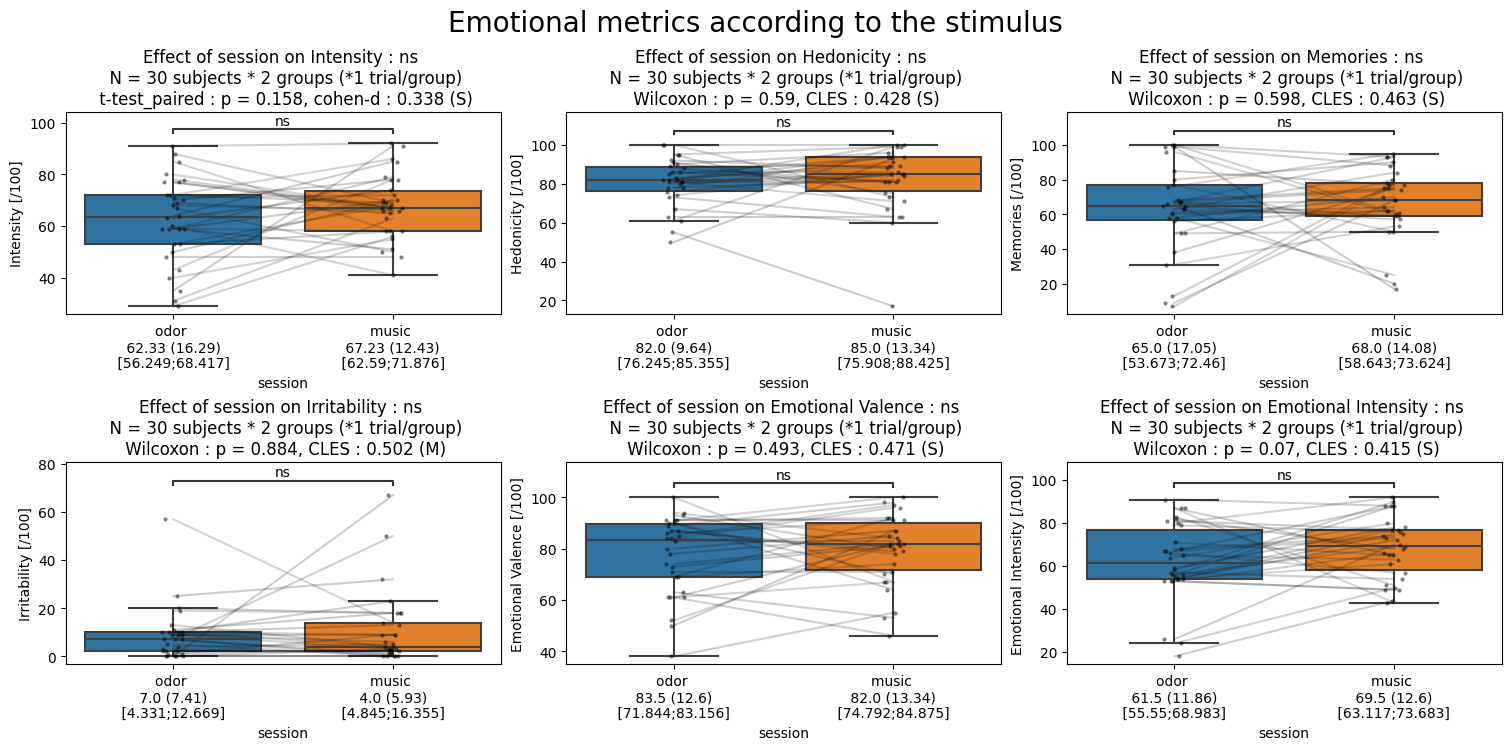

In [14]:
nrows = 2
ncols = 3

array_metrics = np.array(metrics).reshape(nrows, ncols)

fig , axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15,7), constrained_layout = True)
fig.suptitle('Emotional metrics according to the stimulus', y = 1.05 , fontsize = 20)

for r in range(nrows):
    for c in range(ncols):

        ax = axs[r,c]
        metric = array_metrics[r,c]
        gh.auto_stats(df = df, predictor = 'session', outcome = metric, design = 'within', subject = 'participant', ax=ax, outcome_clean_label = clean_label[metric], outcome_unit = '/100')

fig.savefig(base_folder / 'Figures' / 'Psycho' / 'psycho_emotions.png', bbox_inches = 'tight')

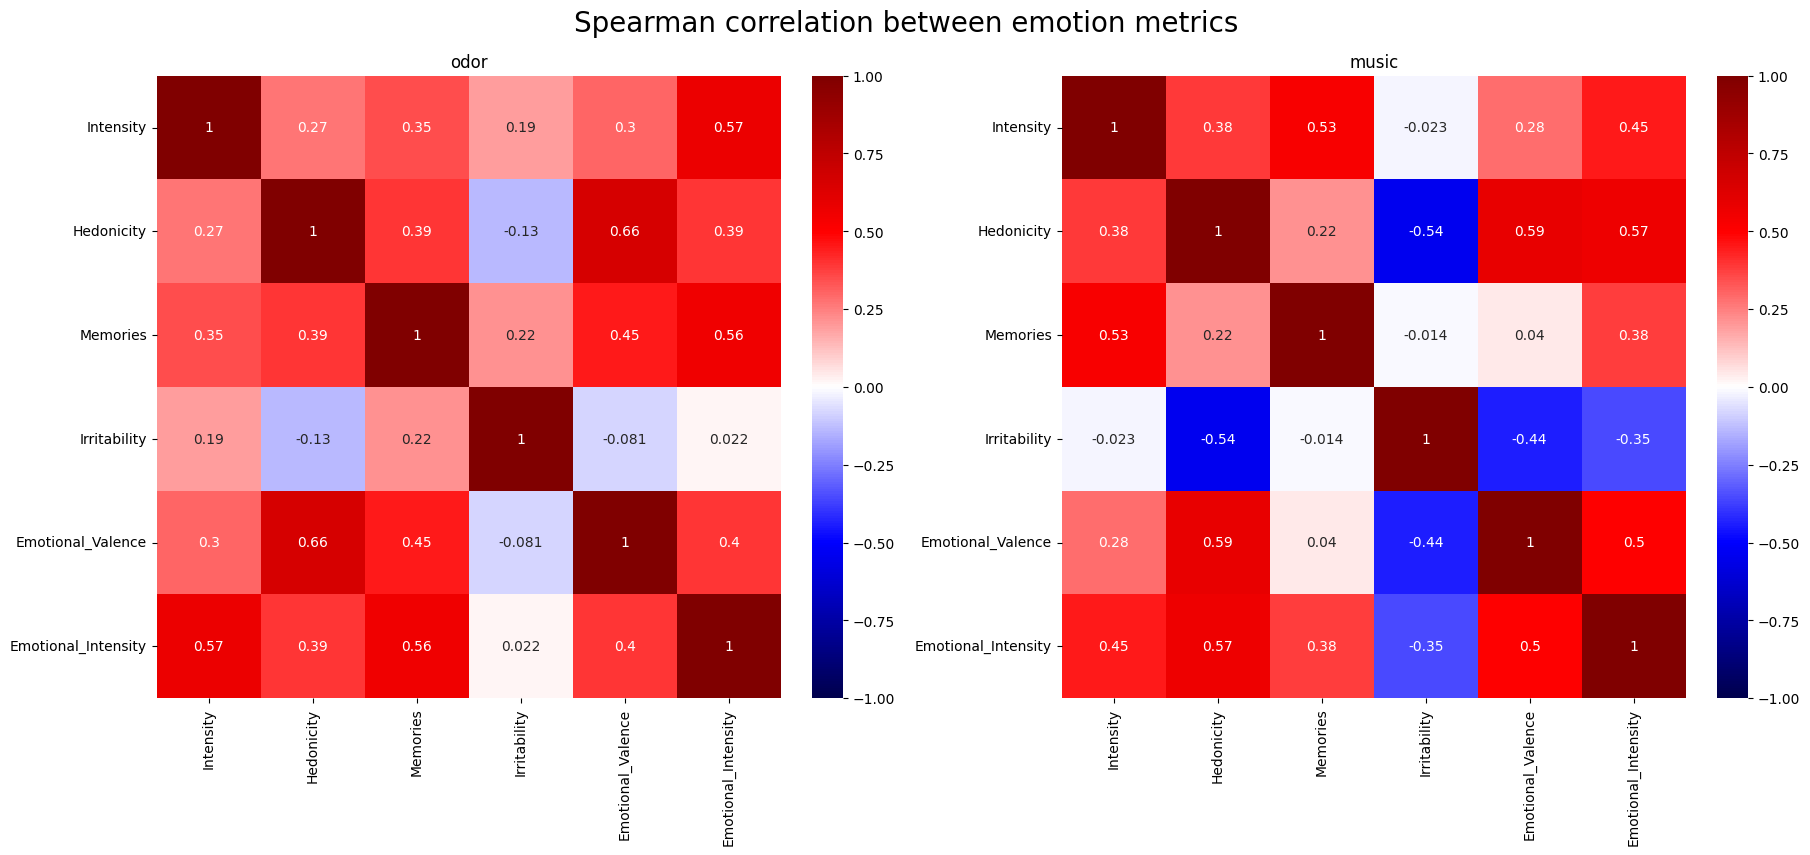

In [15]:
ncols = 2

fig, axs = plt.subplots(ncols = ncols, figsize = (18,8), constrained_layout = True)
fig.suptitle('Spearman correlation between emotion metrics', fontsize = 20, y = 1.05)

for c, ses in enumerate(['odor','music']):
    ax = axs[c]
    sns.heatmap(df[df['session'] == ses].corr('spearman',numeric_only = True), annot = True, cmap = 'seismic' , vmin = - 1, vmax = 1, ax=ax)
    ax.set_title(ses)

fig.savefig(base_folder / 'Figures' / 'Psycho' / 'correlation_emotions.png', bbox_inches = 'tight')